In [1]:
%matplotlib inline

import seaborn as sns
sns.set_color_codes()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from pvlib.forecast import GFS, NAM, NDFD, HRRR, RAP
import math

latitude, longitude, tz = 41.39, 2.16, 'CET'
#start = pd.Timestamp(datetime.date.today(), tz=tz)
#end = start + pd.Timedelta(days=7)
end = pd.Timestamp(datetime.date.today(), tz=tz)
start = end - pd.Timedelta(days=6)
irrad_vars = ['ghi', 'dni', 'dhi']

model = GFS()
raw_data = model.get_data(latitude, longitude, start, end)

/Users/will/anaconda3/envs/emap/lib/python2.7/site-packages/pvlib/forecast.py:22: UserWarning: The forecast module algorithms and features are highly experimental. The API may change, the functionality may be consolidated into an io module, or the module may be separated into its own package.
  'module, or the module may be separated into its own package.')


In [3]:
data = raw_data
data = model.rename(data)

data['temp_air'] = model.kelvin_to_celsius(data['temp_air'])
data['wind_speed'] = model.uv_to_speed(data)
data['wind_direction'] = np.degrees(np.arctan2(data['wind_speed_u'], data['wind_speed_v'])) + 180

irrad_data = model.cloud_cover_to_irradiance(data['total_clouds'])
data = data.join(irrad_data, how='outer')

data = data.ix[:, ['wind_speed', 'wind_direction', 'wind_speed_gust']]
#data = data.ix[:, model.output_variables]
data.head()

,wind_speed,wind_direction,wind_speed_gust
2017-03-29 00:00:00+02:00,2.241629,315.542236,2.3
2017-03-29 03:00:00+02:00,2.632508,329.148193,2.7
2017-03-29 06:00:00+02:00,3.390236,332.603516,3.5
2017-03-29 09:00:00+02:00,1.574865,341.104858,2.1
2017-03-29 12:00:00+02:00,2.531600,159.417465,1.7


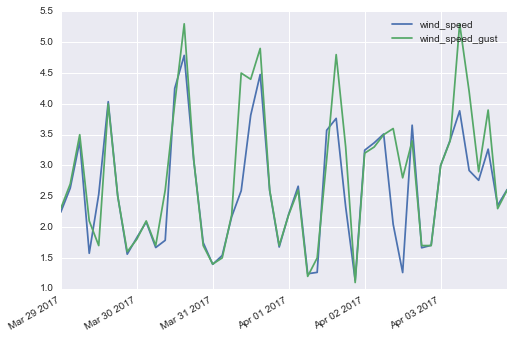

In [4]:
data['wind_speed'].plot()
data['wind_speed_gust'].plot()
plt.legend()

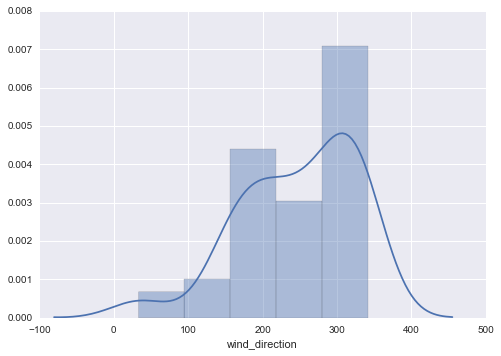

In [5]:
sns.distplot(data['wind_direction'])

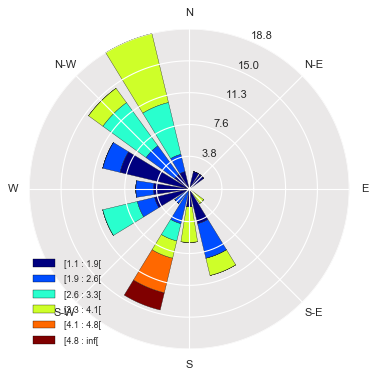

In [6]:
from windrose import WindroseAxes
import matplotlib.cm as cm

wd = data['wind_direction']
ws = data['wind_speed']

ax = WindroseAxes.from_ax()
ax.set_axis_bgcolor('#eae8e8')
ax.bar(wd, ws, normed=True, opening=0.8)
ax.set_legend()
plt.gcf().set_size_inches(5, 5)